# N-D

고차원 데이터와 데이터 속성 간의 관계를 탐색하기 위해, 파일 **Diabetes.csv**를 로드하겠습니다. 이 파일은 Kaggle에서 가져온 것입니다.

In [20]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

In [21]:
df_original = pd.read_csv("Diabetes.csv")
df_original.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [22]:
cols = [c for c in df_original.columns if c not in ["Pregnancies", "Outcome"]]
df = df_original.copy()
df[cols] = df[cols].replace({0: np.nan})
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.0,NaN,33.6,0.627,50,1
1,1,85.0,66.0,29.0,NaN,26.6,0.351,31,0
2,8,183.0,64.0,NaN,NaN,23.3,0.672,32,1
3,1,89.0,66.0,23.0,94.0,28.1,0.167,21,0
4,0,137.0,40.0,35.0,168.0,43.1,2.288,33,1


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   763 non-null    float64
 2   BloodPressure             733 non-null    float64
 3   SkinThickness             541 non-null    float64
 4   Insulin                   394 non-null    float64
 5   BMI                       757 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(6), int64(3)
memory usage: 54.1 KB


# Actually viewing the data

자, 놀랍지도 않게도, 데이터를 보는 것은 실제로 유용합니다. head 함수를 곧바로 사용하면, 이 데이터 세트가 0을 '값이 없음'을 나타내기 위해 사용하고 있다는 것을 알 수 있습니다. 물론, 불행한 누군가가 실제로 피부 두께가 0인 경우가 아니라면 말이죠.

만약 데이터에 대한 단순한 조사(expect) 이상의 작업을 원한다면, 이전 섹션에서 이야기했던 describe 함수를 사용할 수 있습니다.

In [24]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,763.000000,733.000000,541.000000,394.000000,757.000000,768.000000,768.000000,768.000000
mean,3.845052,121.686763,72.405184,29.153420,155.548223,32.457464,0.471876,33.240885,0.348958
std,3.369578,30.535641,12.382158,10.476982,118.775855,6.924988,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,22.000000,76.250000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,29.000000,125.000000,32.300000,0.372500,29.000000,0.000000
75%,6.000000,141.000000,80.000000,36.000000,190.000000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


# Scatter Matrix

이것은 유용한 한 줄짜리 명령입니다... 하지만 **숫자형 데이터(numeric data)**에만 작동한다는 점에 유의하십시오. 만약 거기에 **범주형 데이터(categorical data)**를 포함하고 싶다면, 해당 범주들을 숫자형 레이블로 변환해야 합니다.

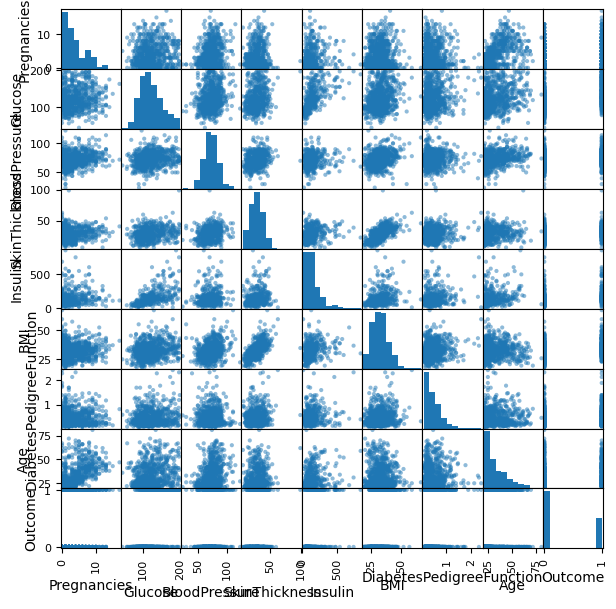

In [25]:
pd.plotting.scatter_matrix(df, figsize=(7, 7));

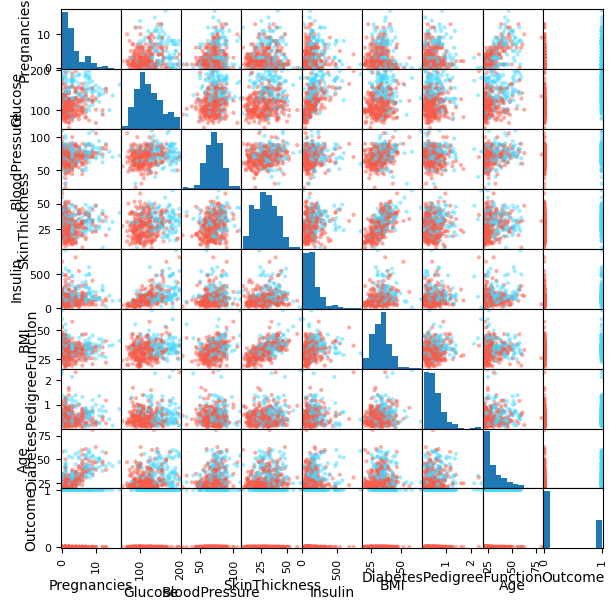

In [26]:
df2 = df.dropna()
colors = df2["Outcome"].map(lambda x: "#44d9ff" if x else "#f95b4a")
pd.plotting.scatter_matrix(df2, figsize=(7,7), color=colors);

**산점도(scatter plot)**는 대각선 부분에 각 분포의 히스토그램을 보여줄 뿐만 아니라, 대각선 이외의 부분에는 많은 2차원 산점도를 보여줍니다. 이 행렬은 대칭이기 때문에, 저는 보통 대각선과 그 아래 부분만 확인합니다. 우리는 일부 변수가 분산(scatter)이 크고, 일부는 상관관계(correlated)가 있음을 알 수 있습니다(즉, 분산에 방향성이 있다는 뜻입니다).

# 상관관계 플롯 (Correlation Plots)

이는 어떤 변수/속성이 다른 변수와 상관관계가 있는지를 쉽게 정량화하기 위함입니다!

In [27]:
df.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128135,0.214178,0.100239,0.082171,0.021719,-0.033523,0.544341,0.221898
Glucose,0.128135,1.000000,0.223192,0.228043,0.581186,0.232771,0.137246,0.267136,0.494650
BloodPressure,0.214178,0.223192,1.000000,0.226839,0.098272,0.289230,-0.002805,0.330107,0.170589
SkinThickness,0.100239,0.228043,0.226839,1.000000,0.184888,0.648214,0.115016,0.166816,0.259491
Insulin,0.082171,0.581186,0.098272,0.184888,1.000000,0.228050,0.130395,0.220261,0.303454
BMI,0.021719,0.232771,0.289230,0.648214,0.228050,1.000000,0.155382,0.025841,0.313680
DiabetesPedigreeFunction,-0.033523,0.137246,-0.002805,0.115016,0.130395,0.155382,1.000000,0.033561,0.173844
Age,0.544341,0.267136,0.330107,0.166816,0.220261,0.025841,0.033561,1.000000,0.238356
Outcome,0.221898,0.494650,0.170589,0.259491,0.303454,0.313680,0.173844,0.238356,1.000000


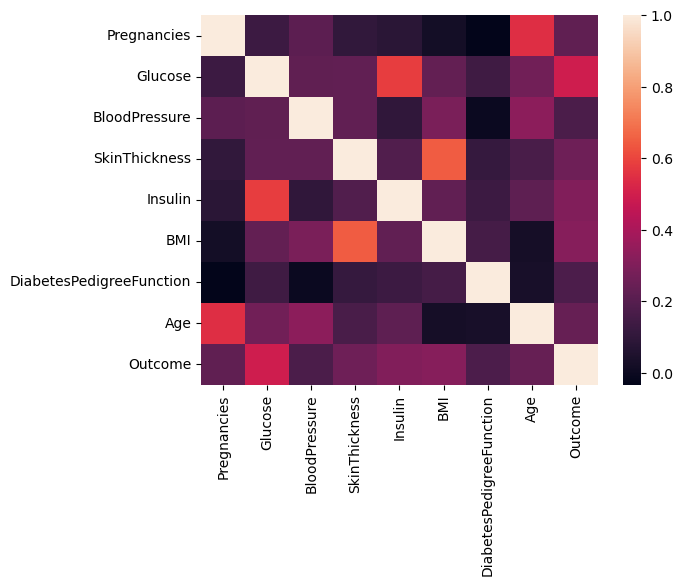

In [28]:
sb.heatmap(df.corr());

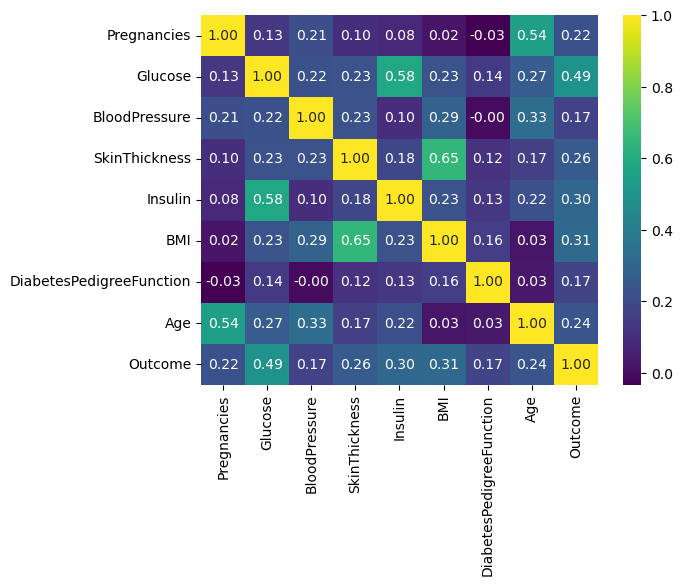

In [29]:
sb.heatmap(df.corr(), annot=True, cmap="viridis", fmt="0.2f");

그리고 이것이 대칭 행렬이라는 것을 여기서도 볼 수 있습니다. 하지만 이는 가장 강하게 상관관계가 있는 속성(attribute)과 가장 강하게 반비례 관계에 있는 속성을 즉시 지적할 수 있게 해 줍니다. 일부는 상식적인 내용일 수 있습니다(예: 임신 횟수와 나이). 하지만 일부는 데이터에 대한 진정한 통찰을 제공할 수도 있습니다.


# 2차원 히스토그램 (2D Histograms)

이 섹션의 나머지 부분에서는 더 많은 데이터가 포함된 다른 데이터 세트를 사용할 것입니다.

데이터가 아주 많을 때 유용합니다.

In [30]:
df2 = pd.read_csv("height_weight.csv")
df2.info()
df2.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   sex     4231 non-null   int64  
 1   height  4231 non-null   float64
 2   weight  4231 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 99.3 KB


,sex,height,weight
count,4231.000000,4231.000000,4231.000000
mean,1.540061,66.903607,174.095122
std,0.498451,4.313004,38.896171
min,1.000000,55.400000,96.590000
25%,1.000000,63.730000,144.315000
50%,2.000000,66.630000,170.100000
75%,2.000000,69.970000,198.660000
max,2.000000,79.610000,298.440000


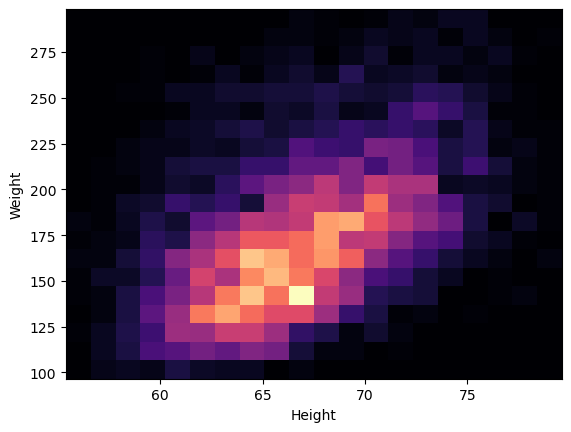

In [31]:
plt.hist2d(df2["height"], df2["weight"], bins=20, cmap="magma")
plt.xlabel("Height")
plt.ylabel("Weight");

# 등고선 플롯 (Contour plots)
2차원 히스토그램에서 정보를 얻기가 좀 어렵죠? 이미지에 **노이즈(noise)**가 너무 많습니다.

등고선 다이어그램을 시도해 보는 건 어떨까요? 이 경우, 데이터를 **직접 빈(bin)**으로 나누어야 할 것입니다. 등고선 API는 여기에 있습니다.

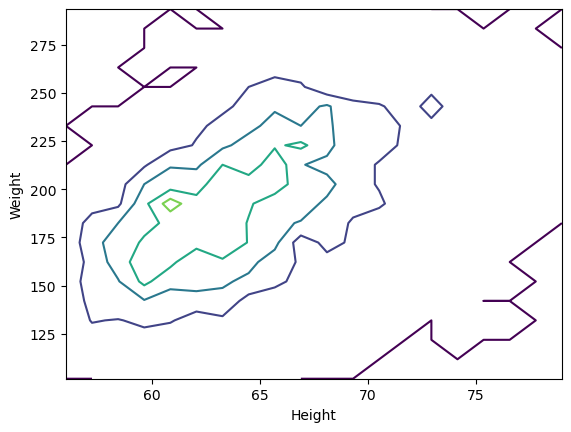

In [32]:
hist, x_edge, y_edge = np.histogram2d(df2["height"], df2["weight"], bins=20)
x_center = 0.5 * (x_edge[1:] + x_edge[:-1])
y_center = 0.5 * (y_edge[1:] + y_edge[:-1])

plt.contour(x_center, y_center, hist, levels=4)
plt.xlabel("Height")
plt.ylabel("Weight");

아이고, 등고선 플롯으로 봐도 여전히 노이즈가 많은 것 같군요! 일반적으로 2차원 히스토그램과 등고선 플롯은 데이터의 양이 많아야 합니다. 우리는 매끄러운 결과를 얻기에 데이터가 충분하지 않은 것입니다!

# KDE 플롯 (KDE Plots)
우리가 데이터를 직접 평활화(smooth)할 수 있다면 얼마나 좋을까요? Seaborn이 해결해 줍니다!

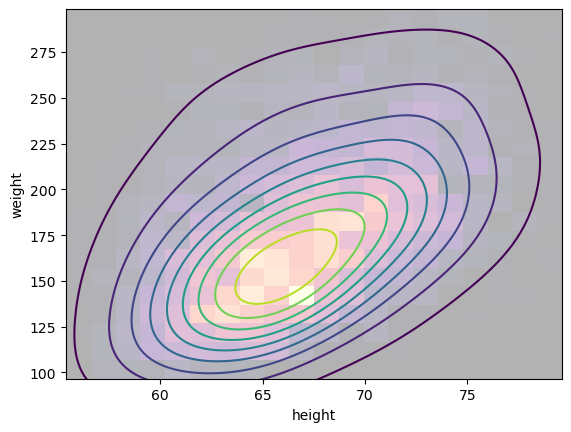

In [33]:
sb.kdeplot(x=df2["height"], y=df2["weight"], cmap="viridis", bw_adjust=2)
plt.hist2d(df2["height"], df2["weight"], bins=20, cmap="magma", alpha=0.3);

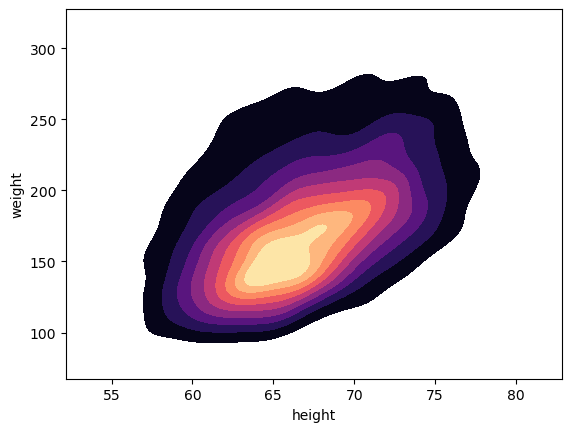

In [34]:
sb.kdeplot(x=df2["height"], y=df2["weight"], cmap="magma", fill=True);

# 단순함의 옹호 (In Defense of Simplicity)

때로는 화려할 필요가 없습니다. 잠시 멈추어 우리가 무엇을 보기를 원하는지 파악한다면, **산점도(scatter plot)**는 보통 상당히 유익하고 플롯(plot)으로 나타내기 매우 빠릅니다.

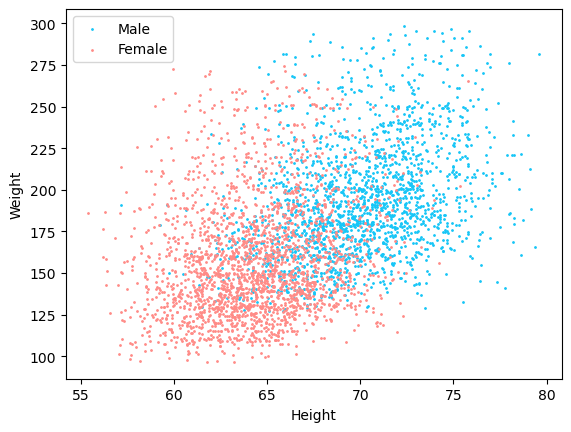

In [35]:
m = df2["sex"] == 1
plt.scatter(df2.loc[m, "height"], df2.loc[m, "weight"], c="#16c6f7", s=1, label="Male")
plt.scatter(df2.loc[~m, "height"], df2.loc[~m, "weight"], c="#ff8b87", s=1, label="Female")
plt.xlabel("Height")
plt.ylabel("Weight")
plt.legend(loc=2);

# 확률로 점 처리하기 (Treating points with probability)

라이브러리 ChainConsumer를 사용합니다(예제는 여기 참조). 저는 매일 몇 시간씩 MCMC 체인 및 **사후 표본(posterior samples)**을 다루며 이를 분석할 더 나은 도구가 필요해서 이 라이브러리를 직접 작성했습니다.

ChainConsumer는 표준 아나콘다 패키지가 아니므로, 설치를 위해 아래 명령을 실행해야 합니다.

pip install chainconsumer

주의: 멋진 레이블을 위한 LaTeX가 없으면, configure 메서드에서 **usetex=False**로 설정해야 합니다. 제가 여러분의 코드 버전에서는 이를 아래에 반영해 두었습니다. 이는 영상에는 없는 내용입니다.

In [36]:
params = ["height", "weight"]
male = df2.loc[m, params].values
female = df2.loc[~m, params].values
male.shape

(1946, 2)

In [37]:
!pip show chainconsumer

Name: ChainConsumer
Version: 0.34.0
Summary: Consume chains and produce plots and tables
Home-page: http://github.com/samreay/ChainConsumer
Author: Samuel Hinton
Author-email: samuelreay@gmail.com
License: 
Location: /opt/anaconda3/lib/python3.13/site-packages
Requires: matplotlib, numpy, pandas, scipy, statsmodels
Required-by: 


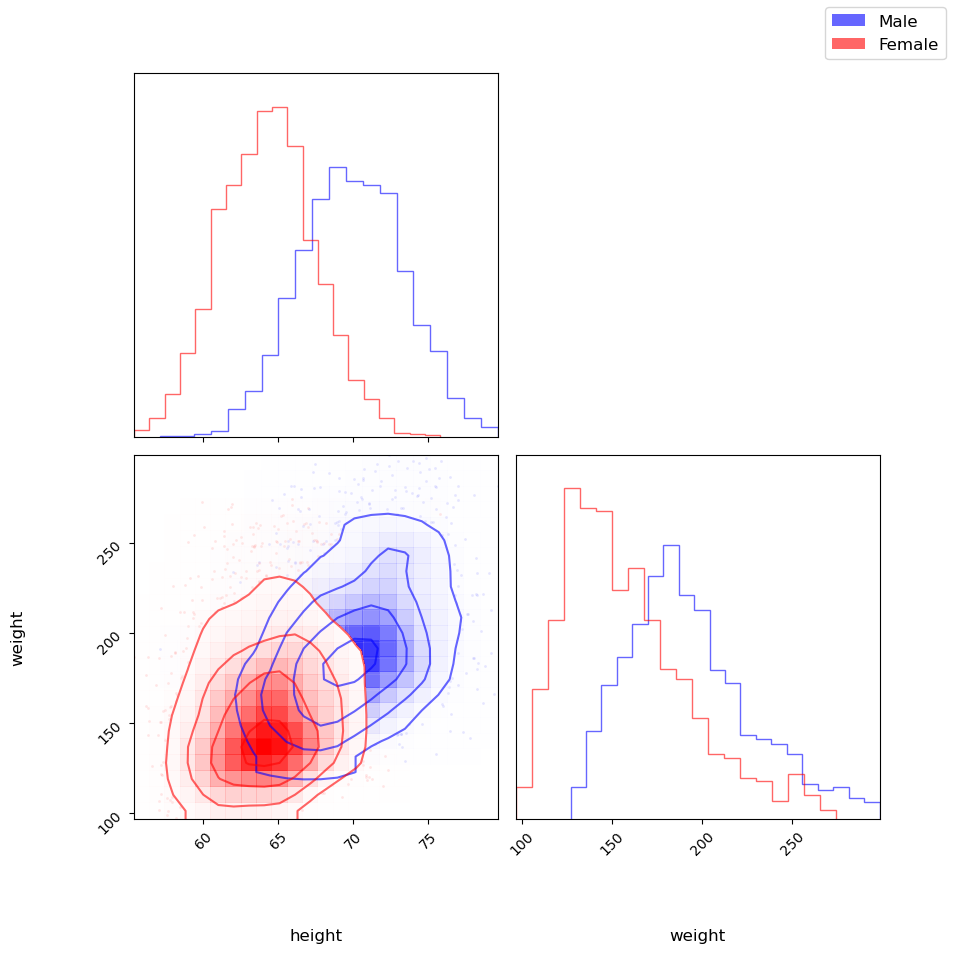

In [40]:
import corner
import matplotlib.pyplot as plt
import numpy as np

# Figure 생성
fig = plt.figure(figsize=(10, 10))

# Male 데이터 플롯 (파란색)
corner.corner(male, labels=params, color='b', 
              fig=fig,
              smooth=1.0,  # kde=1.0과 유사한 효과
              label_kwargs={"fontsize": 12},
              title_kwargs={"fontsize": 12},
              hist_kwargs={"alpha": 0.6},
              contour_kwargs={"alpha": 0.6})

# Female 데이터를 같은 플롯에 오버레이 (빨간색)
corner.corner(female, labels=params, color='r',
              fig=fig,
              smooth=1.0,
              hist_kwargs={"alpha": 0.6},
              contour_kwargs={"alpha": 0.6})

# 범례 추가
from matplotlib.patches import Patch
legend_elements = [Patch(facecolor='b', alpha=0.6, label='Male'),
                   Patch(facecolor='r', alpha=0.6, label='Female')]
fig.legend(handles=legend_elements, loc='upper right', fontsize=12)

plt.show()

In [ ]:
c.plotter.plot_summary(figsize=2.0);

기억하세요. 시각화할 때는 단순하게 시작하고, 데이터가 필요하다고 보여줄 때만 복잡성을 추가하세요. 필요하지 않은데 너무 깊이 파고들어 시간을 낭비할 필요는 없습니다.

아, 그리고 여러분은 우리가 많은 플롯에 대해 이야기했지만, 파이 차트에 대해서는 언급하지 않았다는 것을 눈치챘을 수도 있습니다. 파이 차트는 절대 사용하지 마세요. 절대로요.